In [2]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# EXTERNAL VALIDATION OVER COMPLETOS

In [33]:
path = '/home/mr1142/Documents/Data/global_pneumonia_validation/val'
path = '/home/mr1142/Documents/Data/global_pneumonia_selection/val'
real = pd.read_csv(os.path.join(path, 'results_comparation.csv'))

In [34]:
prueba = [i for i in real.index if bool(re.search('prueba', real.name[i]))]
completo = [i for i in real.index if not bool(re.search('prueba', real.name[i]))]

In [35]:
real = real.iloc[completo]

## Extraer variables

In [36]:
real['fine'] = [int(re.split('_', real.name[i])[-4][-2:])/10 for i in real.index]
real['fine'] = [1 if real.fine[i] == 0 else real.fine[i] for i in real.index]
real['lr'] = [re.split('_', real.name[i])[-2][3:] for i in real.index]
real['lr'] = [1e-5 if real.lr[i] == '-05' else float('0.' + real.lr[i]) for i in real.index]
real['auc_internal'] = [float(real.name[i][-2:])/100 for i in real.index]

In [37]:
real['mask'] = [1 if bool(re.search('mask', real.name[i])) else 0 for i in real.index]
real['modelo'] = ['EffNet' if bool(re.search('EffNet', real.name[i])) else 'Xception' if bool(re.search('Xception', real.name[i])) else 'IncResNet' for i in real.index]
real['layer'] = [1 if bool(re.search('layer', real.name[i])) else 0 for i in real.index]

In [38]:
real.sort_values('auc')

,name,auc,younden,pr_max,pr_cut,f1_score_younden,precision_score_younden,recall_score_younden,accuracy_score_younden,f1_score_pr_max,...,f1_score_max,precision_score_max,recall_score_max,accuracy_score_max,fine,lr,auc_internal,mask,modelo,layer
0,completo_layer_mask_Xception_fine-05_batch-8_l...,0.814197,0.103933,0.007655,0,0.726368,0.747789,0.726696,0.726696,0.675253,...,0.729628,0.73396,0.728795,0.728795,0.5,0.0001,0.99,1,Xception,1


In [33]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if bool(re.search('completo', modelo))]
modelos_evaluados = list(real['name'])

In [34]:
set(modelos)-set(modelos_evaluados)

{'completo_4_Xception_fine-05_batch-8_lr-0001_auc-99',
 'completo_4_Xception_fine-08_batch-8_lr-0001_auc-98',
 'completo_layer_2_Xception_fine-03_batch-8_lr--05_auc-99'}

In [35]:
set(modelos_evaluados)-set(modelos)

set()

In [36]:
y = 'auc'
data = real
lim = np.percentile(data[y], 20)

[(0.5, 1.0)]

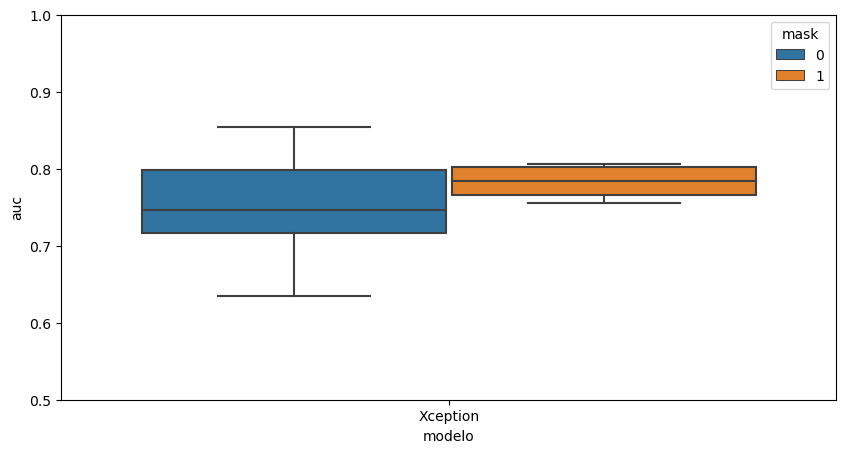

In [37]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(0.5, 1))

[(0.5, 1.0)]

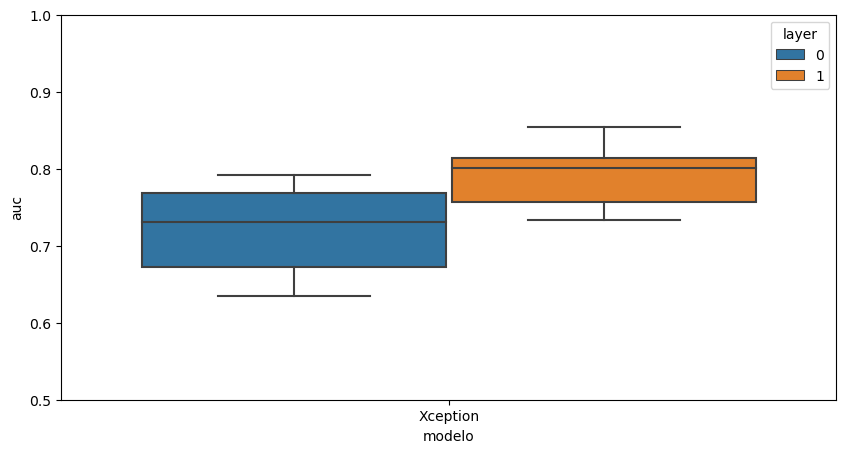

In [40]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="layer",
                data=data)
p.set(ylim=(0.5, 1))

[(0.5, 1.0)]

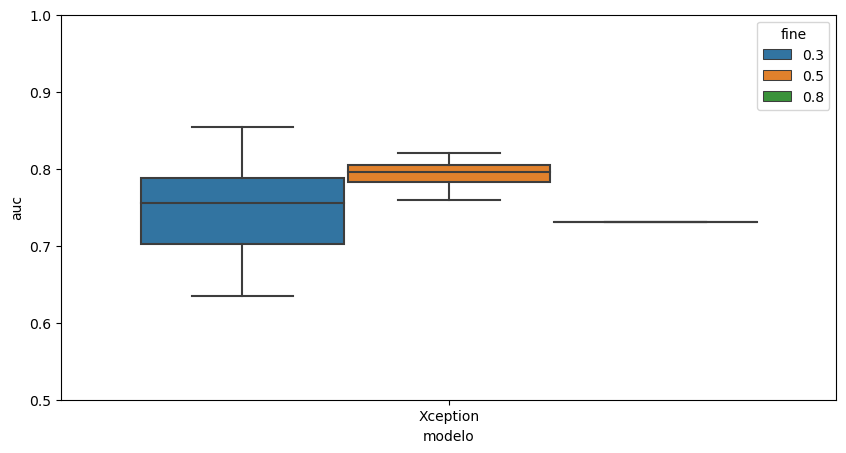

In [41]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(0.5, 1))

[(0.5, 1.0)]

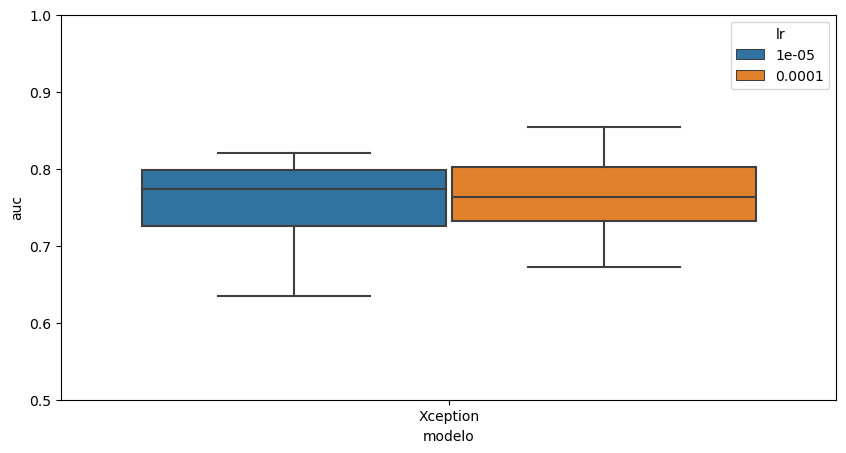

In [42]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(0.5, 1))

[(0.5, 1.0)]

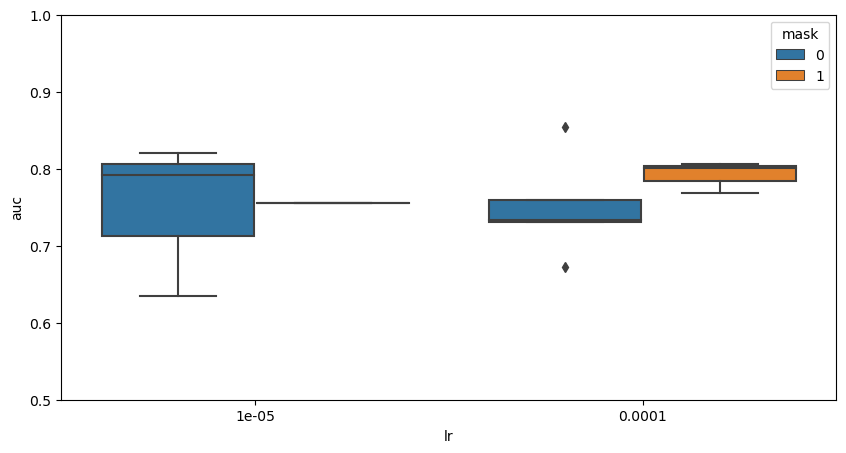

In [43]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(0.5, 1))

[(0.5, 1.0)]

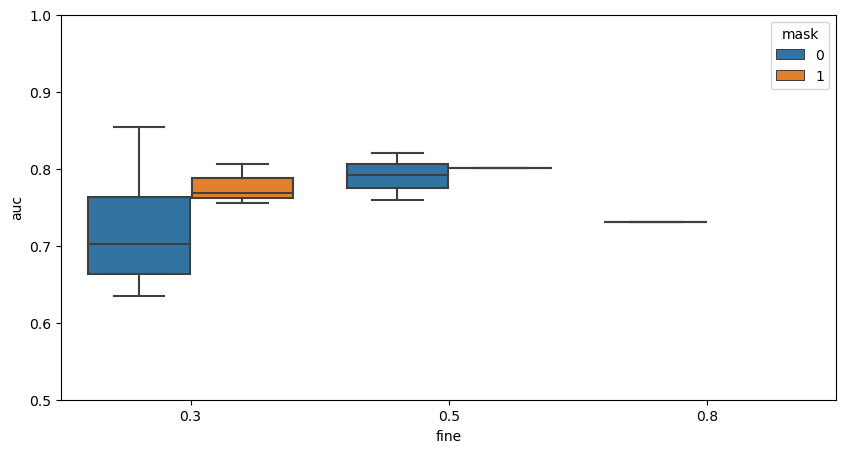

In [45]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(0.5, 1))

[(0.731412845061532, 1.0)]

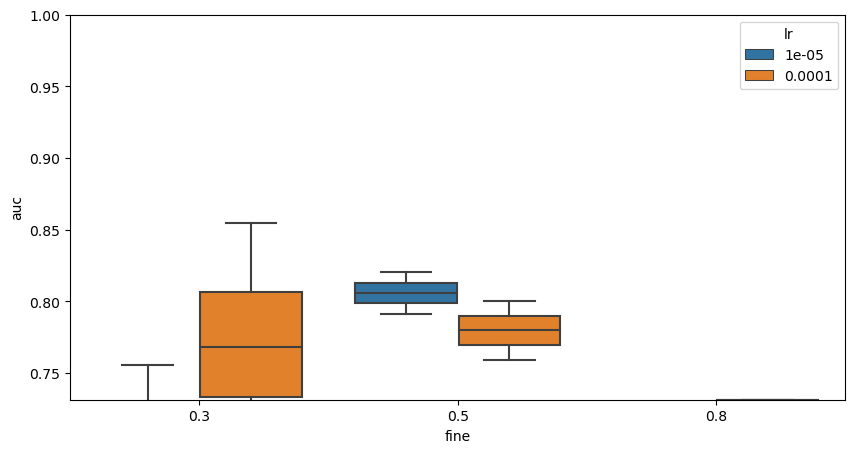

In [46]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

In [48]:
# real.to_csv(os.path.join(path, 'results_comparation.csv'), index = False)